In [65]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models,transforms
from torchvision.utils import make_grid
from torchvision.datasets import MNIST
from torchsummary import summary

import matplotlib.pyplot as plt

Backprop follows three rules: 
1) calculate the loss from the inputs (forward pass)
2) calculate the gradients at each node
3) calculate the gradients of the loss with respect to the inputs witht the chain rule(backward pass)

In [3]:
# The simplest of all examples

x = torch.tensor(1.0,requires_grad=True) # inputs
y = torch.tensor(2.0,requires_grad=True) # outputs
w = torch.tensor(1.0,requires_grad=True) # weights

x.grad_zero = True
y.grad_zero = True
w.grad_zero = True

In [4]:
# forward pass: 

yhat = x * w
loss = (y - yhat)**2

# backward pass:

loss.backward()
w.grad

tensor(-2.)

In [5]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')


# Targets (apples, oranges)
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')


# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)



tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


The general equation for linear regression is $y = m \times x + b$ which will be the follwing in vector notation:

$$\hspace{1.5cm} X \hspace{1.1cm} \times \hspace{0.9cm} W^T \hspace{0.8cm}  + \hspace{1cm} b \hspace{1cm}$$
$$\left[ \begin{array}{cc}
73 & 67 & 43 \\
91 & 88 & 64 \\
\vdots & \vdots & \vdots \\
69 & 96 & 70
\end{array} \right]
%
\times
%
\left[ \begin{array}{cc}
w_{11} & w_{21} \\
w_{12} & w_{22} \\
w_{13} & w_{23}
\end{array} \right]
%
+
%
\left[ \begin{array}{cc}
b_{1} & b_{2} \\
b_{1} & b_{2} \\
\vdots & \vdots \\
b_{1} & b_{2} \\
\end{array} \right]$$

In [13]:
# simple regession from scratch

w = torch.rand(2,3)
b = torch.rand(5,2)

def linreg(x):
    return x @ w.T + b


# # forward pass, calculates the difference between the targets and the calculated model values yhat
# yhat = linreg(inputs)
# loss = (yhat - targets)**2

# loss

# # calculate gradients from scratch with chain rule

# # derivatives of the linear model
# dydw = x
# dydb = 1

# # derivative of the loss fuction for the weights and the intercept aka the gradients

# dlossdw = 2*(yhat - targets).T @ inputs
# dlossdb = 2*(yhat - targets).T @ torch.ones(5,3)


## training loop: 
epochs = 25000
lr = 0.00001

for i in range(epochs):
    # forward pass, calculates the difference between the targets and the calculated model values yhat
    yhat = linreg(inputs)
    loss = (yhat - targets)**2

    # calculate gradients from scratch with chain rule
    # derivatives of the linear model
    dydw = x
    dydb = 1

    # derivative of the loss fuction for the weights and the intercept aka the gradients

    dlossdw = 2*(yhat - targets).T @ inputs
    dlossdb = 2*(yhat - targets).T @ torch.ones(5,5)

    # update weights and intercept 
    w -= lr * dlossdw 
    b -= lr * dlossdb.T


print(w,b)

RuntimeError: The size of tensor a (15) must match the size of tensor b (5) at non-singleton dimension 0

In [14]:
# lets use more data

# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs.shape, targets.shape)

torch.Size([15, 3]) torch.Size([15, 2])


In [69]:
# simple regession from scratch without backprop:

w = torch.rand(2,3)
b = torch.rand(2)

def linreg(x):
    return x @ w.T + b



## training loop: 
epochs = 20000
lr = 0.000001

for i in range(epochs):
    # forward pass, calculates the difference between the targets and the calculated model values yhat
    yhat = linreg(inputs)
    loss = (yhat - targets)**2

    # calculate gradients from scratch with chain rule
    # derivatives of the linear model
    dydw = x
    dydb = 1

    # derivative of the loss fuction for the weights and the intercept aka the gradients

    dlossdw = 2*(yhat - targets).T @ inputs
    dlossdb = 2*(yhat - targets).T @ torch.ones(15,)

    # update weights and intercept 
    w -= lr * dlossdw 
    b -= lr * dlossdb.T


print(w, b)
 
perf_sol = (torch.linalg.inv(inputs.T @ inputs) @ inputs.T @ targets).flatten().tolist() # (Normal Equation)
print(f'The perfect solution for the linear equation system is: {[round(x,4) for x in perf_sol]} for the weights. The solution found through gradient descent is therefore good.')

# plt.plot(steps, losses)

tensor([[-0.4058,  0.8482,  0.6827],
        [-0.3088,  0.7945,  0.9049]]) tensor([0.7310, 0.8501])
The perfect solution for the linear equation system is: [-0.4002, -0.3023, 0.848, 0.7944, 0.6875, 0.9105] for the weights. The solution found through gradient descent is therefore good.


While this works it is tidious and not a good system for larger and more complex networks. Therefore we will use the same system as before and use backprop.

In [43]:
# Data
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70], [73, 67, 43], [91, 88, 64], [87, 134, 58], [102, 43, 37], [69, 96, 70]], dtype='float32')
# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119], 
                    [56, 70], [81, 101], [119, 133], [22, 37], [103, 119]], dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

print(inputs.shape, targets.shape)

torch.Size([15, 3]) torch.Size([15, 2])


In [88]:
# weights and intercepts require gradient information so we have to tell pytorch to track it
# simple regession from scratch without backprop:

w = torch.rand(2,3, requires_grad=True)
b = torch.zeros(2, requires_grad=True)

def linreg(x):
    return x @ w.T + b


## training loop: 
epochs = 500
lr = 0.000001
steps = []
losses = []

for i in range(epochs):
    # forward pass, calculates the difference between the targets and the calculated model values yhat
    yhat = linreg(inputs)
    loss = torch.sum((yhat - targets)**2)

    losses.append(loss.detach().numpy()) # required to plot
    steps.append(i)

    # backward pass, calculates the gradients of the model with respect to the loss
    loss.backward()
    
    # update weights and intercept 
    with torch.no_grad(): # required because otherwise the gradients are constantly added 
        w -= w.grad * lr
        b -= b.grad * lr
        w.grad.zero_()
        b.grad.zero_()

 
perf_sol = (torch.linalg.inv(inputs.T @ inputs) @ inputs.T @ targets).flatten().tolist() # (Normal Equation)
print(f'The perfect solution for the linear equation system is: {[round(x,4) for x in perf_sol]} for the weights. The solution found through gradient descent is {w.detach().numpy()}.')



The perfect solution for the linear equation system is: [-0.4002, -0.3023, 0.848, 0.7944, 0.6875, 0.9105] for the weights. The solution found through gradient descent is [[-0.37811652  0.8840496   0.59595454]
 [-0.28420344  0.82392687  0.8354083 ]].


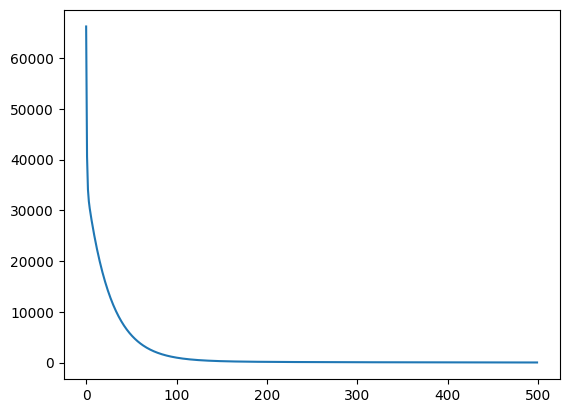

In [89]:
plt.plot(steps, losses)

In [51]:
5**24

59604644775390625